In [2]:
#Import libraries to be used in the file
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import nasdaqdatalink

1. Using the World Bank Indicators, download data for “GDP per capita (current US$)” and “Malnutrition prevalence, weight for age (% of children under 5).” What kind of relationship do you expect? Make a scatter plot of malnutrition prevalence against GDP per capita (using all available years and countries). What kind of relationship do you see? Make a graph for the geographical regions (six regions excluding North America and use a different color for each). Make a graph for income levels (four income levels and use a different color for each). Carefully label all graphs and provide legends.

In [3]:
#Load the GDP data and metadata from the dowloaded files
gdp_data = pd.read_csv('GDP_Per_Capita.csv', skiprows = 4, index_col=1)
gdp_metadata = pd.read_csv('Metadata_Country_API_GDP_Per_Capita.csv', index_col=0)
#Drop the columns named 'Unnamed'
gdp_metadata.drop(gdp_metadata.filter(regex="Unnamed"),axis=1, inplace=True)
gdp_data.drop(gdp_data.filter(regex="Unnamed"),axis=1, inplace=True)

In [4]:
#Load the malnutrition prevalance data and metadata from the dowloaded files
ufc_data = pd.read_csv('Underweight_Children_Data.csv', skiprows = 4, index_col=1)
ufc_metadata = pd.read_csv('Metadata_Country_API_Underweight_Children_Data.csv', index_col=0)
#Drop the columns named 'Unnamed'
ufc_data.drop(ufc_data.filter(regex="Unnamed"),axis=1, inplace=True)
ufc_metadata.drop(ufc_metadata.filter(regex="Unnamed"),axis=1, inplace=True)

In [5]:
#Merge the GDP data and metadata dataframes into one dataframe
gdp_df = pd.merge(gdp_metadata,gdp_data,on='Country Code')
#Merge the malnutrition prevalance data and metadata dataframes into one dataframe
ufc_df = pd.merge(ufc_metadata,ufc_data,on='Country Code')

In [6]:
#Trim the GDP and malnutrition prevalance dataframes by dropping columns we will not use
gdp_df_trim = gdp_df.drop(["Region","IncomeGroup","TableName","Country Name","Indicator Name","Indicator Code","SpecialNotes"], axis=1)
ufc_df_trim = ufc_df.drop(["Region","IncomeGroup","TableName","Country Name","Indicator Name","Indicator Code","SpecialNotes"], axis=1)

In [7]:
#Use the pandas melt() function on the GDP and malnutrition prevalance dataframes
#to transpose the columns containing years into rows grouped by year
gdp_melt = gdp_df_trim.melt(ignore_index=False,var_name="Year",value_name="GDP")
ufc_melt = ufc_df_trim.melt(ignore_index=False,var_name="Year",value_name="MalnutritionData")

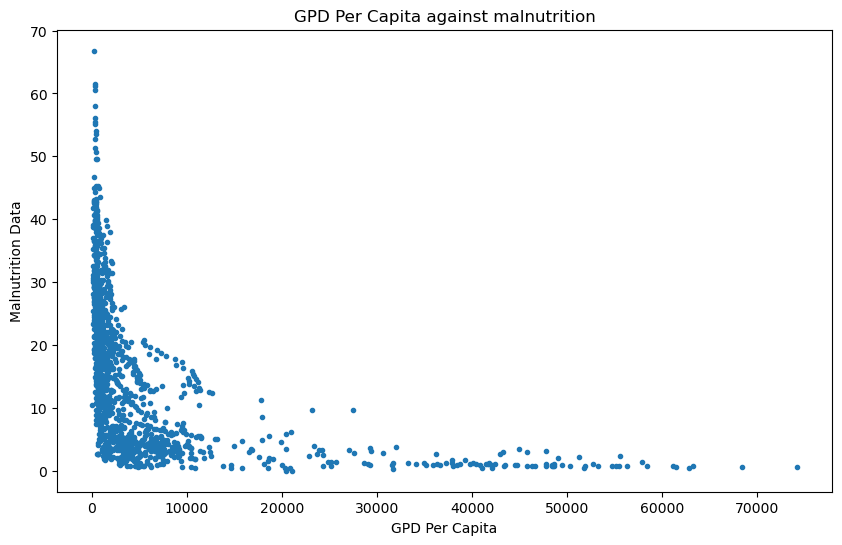

In [8]:
#Plot a scatterplot of GDP data against malnutrition data
plt.figure(figsize=(10,6))
plt.title("GPD Per Capita against malnutrition")
plt.xlabel("GPD Per Capita")
plt.ylabel("Malnutrition Data")
plt.scatter(gdp_melt['GDP'],ufc_melt['MalnutritionData'], marker='.')
plt.show()

In [9]:
#Drop all rows with region as ‘North America’ from the two dataframes
country_gdp = gdp_df.drop(gdp_df[gdp_df["Region"]=='North America'].index)
country_ufc = ufc_df.drop(ufc_df[ufc_df["Region"]=='North America'].index)

In [10]:
#Trim the regional GDP and malnutrition prevalance dataframes by dropping columns we will not use
country_gdp_trim = country_gdp.drop(["TableName","Country Name","Indicator Name","Indicator Code","SpecialNotes"], axis=1)
country_ufc_trim = country_ufc.drop(["TableName","Country Name","Indicator Name","Indicator Code","SpecialNotes"], axis=1)

In [11]:
#Use the pandas melt() function on the regional GDP and malnutrition prevalance dataframes
#to transpose the columns containing years into rows grouped by year

#Maintain the Region and Income Group columns using the parameter id_vars to use for display in the scatterplots
country_gdp_trim_melt = country_gdp_trim.melt(ignore_index=False,id_vars=["Region","IncomeGroup"],var_name="Year",value_name="GDP")
country_ufc_trim_melt = country_ufc_trim.melt(ignore_index=False,id_vars=["Region","IncomeGroup"],var_name="Year",value_name="MalnutritionData")

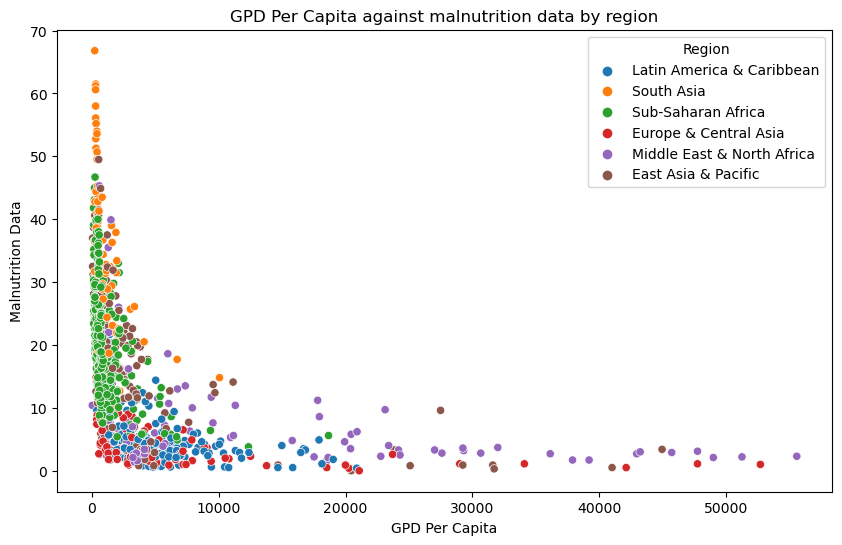

In [12]:
#x.	Plot a scatterplot of GDP data against malnutrition data grouped by geographical regions
plt.figure(figsize=(10,6))
plt.title("GPD Per Capita against malnutrition data by region")
plt.xlabel("GPD Per Capita")
plt.ylabel("Malnutrition Data")
sns.scatterplot(x=country_gdp_trim_melt['GDP'],y=country_ufc_trim_melt['MalnutritionData'], markers='.', hue=country_gdp_trim_melt['Region'])
plt.show()

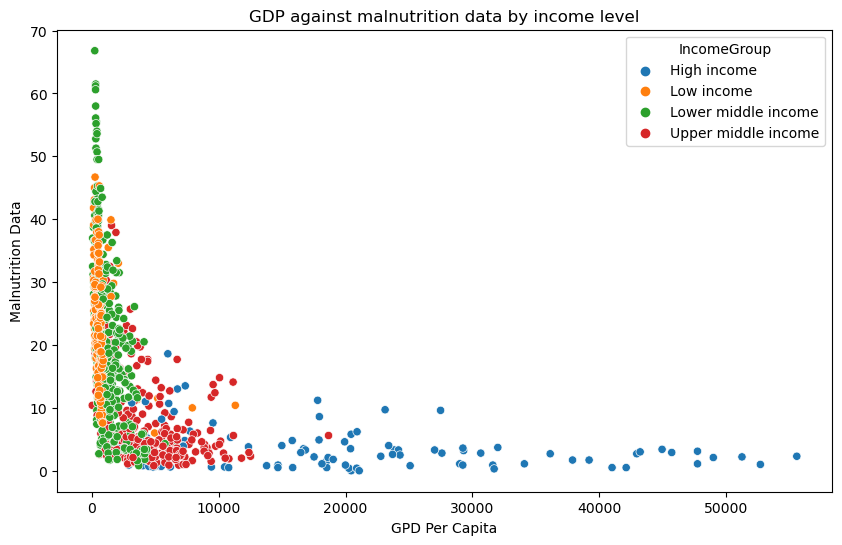

In [13]:
plt.figure(figsize=(10,6))
plt.title("GDP against malnutrition data by income level")
plt.xlabel("GPD Per Capita")
plt.ylabel("Malnutrition Data")
sns.scatterplot(x=country_gdp_trim_melt['GDP'],y=country_ufc_trim_melt['MalnutritionData'], markers='.', hue=country_gdp_trim_melt['IncomeGroup'])
plt.show()

2. Using Quandl, download data, synchronize the time stamps and plot time series for the prices of Wheat, Crude Oil and Gold in $ on the
same graph. Indicate the maximum and minimum prices in all three time series using coloured dots. Use a legend to explain each one.

In [14]:
#Configure the API key for accessing the nasdaqdatalink API
nasdaqdatalink.ApiConfig.api_key = "PQVyzUb4YWx1kUZccLQi"

#Use the nasdaqdatalink API to load price data for Wheat, Crude Oil and Gold
wheat_data = nasdaqdatalink.get('ODA/PWHEAMT_USD')
oil_data = nasdaqdatalink.get('WGEC/WLD_CRUDE_WTI')
gold_data = nasdaqdatalink.get('BUNDESBANK/BBK01_WT5511')

In [15]:
#Merge the three dataframes by date and rename the default named columns
all_data_rename = pd.merge(pd.merge(oil_data, gold_data,how="inner", on="Date"),wheat_data,how="inner", on="Date")
all_data = all_data_rename.rename(columns={"Value_x":"OilData","Value_y":"WheatData","Value":"GoldData"})

In [16]:
#Select the minimum values for  Wheat, Crude Oil and Gold data
min_wheat_data = all_data[all_data["WheatData"]==all_data["WheatData"].min()]
min_oil_data = all_data[all_data["OilData"]==all_data["OilData"].min()]
min_gold_data = all_data[all_data["GoldData"]==all_data["GoldData"].min()]

In [17]:
#Select the maximum values for  Wheat, Crude Oil and Gold data
max_wheat_data = all_data[all_data["WheatData"]==all_data["WheatData"].max()]
max_oil_data = all_data[all_data["OilData"]==all_data["OilData"].max()]
max_gold_data = all_data[all_data["GoldData"]==all_data["GoldData"].max()]

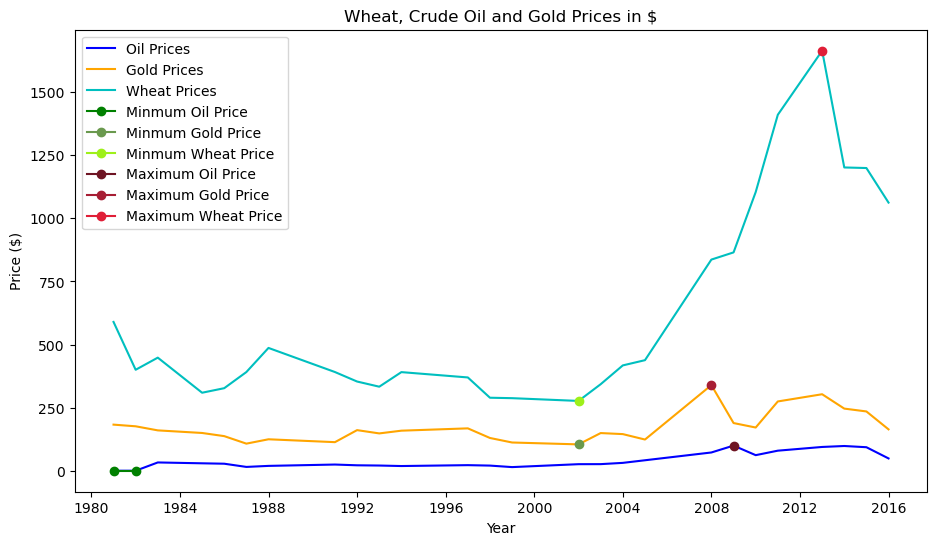

In [19]:
#Plot a time-series graph for the prices of Wheat, Crude Oil and Gold
plt.figure(figsize=(11,6))
plt.title("Wheat, Crude Oil and Gold Prices in $")
plt.xlabel("Year")
plt.ylabel("Price ($)")
plt.plot(all_data.index, all_data['OilData'], label="Oil Prices", color="blue")
plt.plot(all_data.index, all_data['GoldData'], label="Gold Prices", color="orange")
plt.plot(all_data.index, all_data['WheatData'], label="Wheat Prices", color="c")

#Display marks at the minimum prices for Wheat, Crude Oil and Gold
plt.plot(min_oil_data["OilData"], label="Minmum Oil Price", marker="o", color="#008000")
plt.plot(min_gold_data["GoldData"], label="Minmum Gold Price", marker="o", color="#6a994e")
plt.plot(min_wheat_data["WheatData"], label="Minmum Wheat Price", marker="o", color="#9ef01a")

#Display marks at the maximum prices for Wheat, Crude Oil and Gold
plt.plot(max_oil_data["OilData"], label="Maximum Oil Price", marker="o", color="#6e1423")
plt.plot(max_gold_data["GoldData"], label="Maximum Gold Price", marker="o", color="#a71e34")
plt.plot(max_wheat_data["WheatData"], label="Maximum Wheat Price", marker="o", color="#e01e37")

plt.legend()
plt.show()

3. Download “CO2 emissions (metric tons per capita)” data from the World Bank Indicators. Select the emissions for all countries in 2010 and calculate summary statistics. Provide a table giving the mean, median, standard deviation, 5, 25, 75, and 95 percentiles. Repeat the same process for “School enrolment, primary (% net).”

In [20]:
#Load CO2 emissions data from the downloaded files
CO2_data = pd.read_csv('CO2_Emissions_Data.csv', skiprows = 4, index_col=1)
CO2_data_filtered = CO2_data[["2010"]]

In [21]:
#Use the mean(), median(), std() and quantile() functions to compute
#the mean, median, standard deviation and 5, 25, 75, and 95 percentiles respectively
#Round off the values to 2 decimal points
CO2_mean = round(CO2_data_filtered.mean().values[0],2)
CO2_median = round(CO2_data_filtered.median().values[0],2)
CO2_sd = round(CO2_data_filtered.std().values[0],2)
CO2_p5 = round(CO2_data_filtered.quantile(0.05).values[0],2)
CO2_p25 = round(CO2_data_filtered.quantile(0.25).values[0],2)
CO2_p75 = round(CO2_data_filtered.quantile(0.75).values[0],2)
CO2_p95 = round(CO2_data_filtered.quantile(0.95).values[0],2)

In [22]:
#Create a dictionary to display the computed data
CO2_data_table = {'CO2 Emission Statistics':['Mean','Median','Standard Deviation','5th Percentile','25th Percentile','75th Percentile','95th Percentile'],
              'Value':[CO2_mean,CO2_median,CO2_sd,CO2_p5,CO2_p25,CO2_p75,CO2_p95]}
CO2_statistics_df = pd.DataFrame(CO2_data_table)
#Set the column 'CO2 Emission Statistics' column as the index
CO2_statistics_df = CO2_statistics_df.set_index('CO2 Emission Statistics')
#Display the summary statistics dataframe
CO2_statistics_df

,Value
CO2 Emission Statistics,
Mean,4.30
Median,2.67
Standard Deviation,5.07
5th Percentile,0.11
25th Percentile,0.76
75th Percentile,5.89
95th Percentile,15.17


In [23]:
#Load primary school enrollment data from the downloaded files
school_data = pd.read_csv('Primary_School_Data.csv', skiprows = 4, index_col=1)
school_data_filtered = school_data[["2010"]]

In [24]:
#Use the mean(), median(), std() and quantile() functions to compute
#the mean, median, standard deviation and 5, 25, 75, and 95 percentiles respectively
#Round off the values to 2 decimal points
school_mean = round(school_data_filtered.mean().values[0],2)
school_median = round(school_data_filtered.median().values[0],2)
school_sd = round(school_data_filtered.std().values[0],2)
school_p5 = round(school_data_filtered.quantile(0.05).values[0],2)
school_p25 = round(school_data_filtered.quantile(0.25).values[0],2)
school_p75 = round(school_data_filtered.quantile(0.75).values[0],2)
school_p95 = round(school_data_filtered.quantile(0.95).values[0],2)

In [25]:
#Create a dictionary to display the computed data
school_data_table = {'School Enrolment Statistics':['Mean','Median','Standard Deviation','5th Percentile','25th Percentile','75th Percentile','95th Percentile'],
              'Value':[school_mean,school_median,school_sd,school_p5,school_p25,school_p75,school_p95]}
school_statistics_df = pd.DataFrame(school_data_table)
#Set the column 'School Enrolment Statistics' column as the index
school_statistics_df = school_statistics_df.set_index('School Enrolment Statistics')
#Display the summary statistics dataframe
school_statistics_df

,Value
School Enrolment Statistics,
Mean,104.10
Median,102.84
Standard Deviation,11.55
5th Percentile,84.35
25th Percentile,99.41
75th Percentile,109.10
95th Percentile,123.20


4. The World Bank Indicators provide variables called “Fertility rate, total (births per woman)” and “GDP per capita (current US$)”. Make a scatter plot of Fertility rate versus GDP per capita for all countries in 2010. Produce cumulative distribution functions for the fertility rate variable using data from 1990 and 2010 respectively. Use vertical lines to indicate the mean and median. Use a legend to explain which is the mean and which is the median. Have fertility rates changed over this twenty-year period?

In [26]:
fertility_rate_data = pd.read_csv('Fertility_Rate_Data.csv', skiprows=4)

In [27]:
#Load the data from 2010 into a separate new dataframe
fertility_rate_data_filtered = fertility_rate_data[["2010"]]
#Load the data from question one's GDP dataframe into a separate new dataframe
gdp_data_filtered = gdp_data[["2010"]]

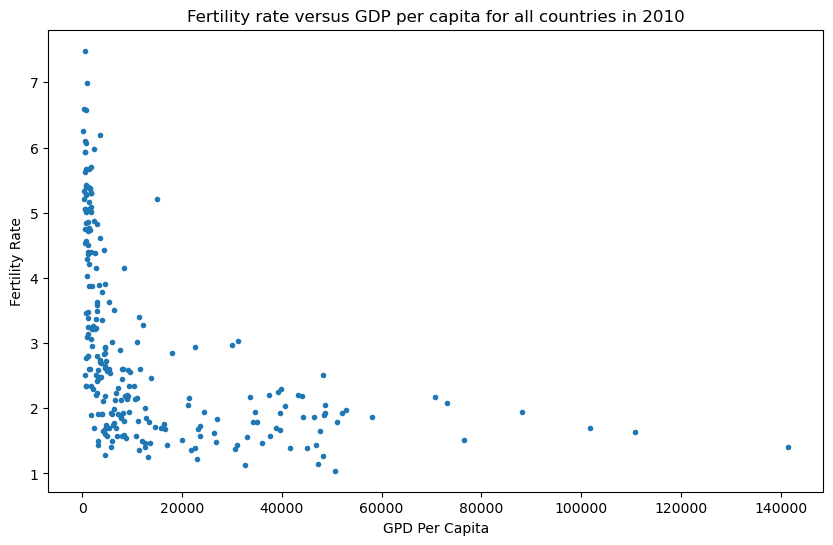

In [28]:
#Plot a scatterplot of Fertility rate versus GDP per capita for all countries in 2010
plt.figure(figsize = (10,6))
plt.title("Fertility rate versus GDP per capita for all countries in 2010")
plt.xlabel("GPD Per Capita")
plt.ylabel("Fertility Rate")
plt.scatter(gdp_data_filtered['2010'],fertility_rate_data_filtered['2010'], marker=".")
plt.show()

In [29]:
#sort the records in the columns for 1990 and 2010 data
fertility_data_1990 = np.sort(fertility_rate_data["1990"])
fertility_data_2010 = np.sort(fertility_rate_data["2010"])

In [30]:
#Compute the cumulative distributions for the sorted data from 1990 and 2010
cummulative_data_1990 = np.cumsum(fertility_data_1990) / np.nansum(fertility_data_1990)
cummulative_data_2010 = np.cumsum(fertility_data_2010) / np.nansum(fertility_data_2010)

In [31]:
#Find the mean from 1990 and 2010 data
mean_1990 = fertility_rate_data["1990"].mean()
mean_2010 = fertility_rate_data["2010"].mean()

#Find the median from 1990 and 2010 data
median_1990 = fertility_rate_data["1990"].median()
median_2010 = fertility_rate_data["2010"].median()

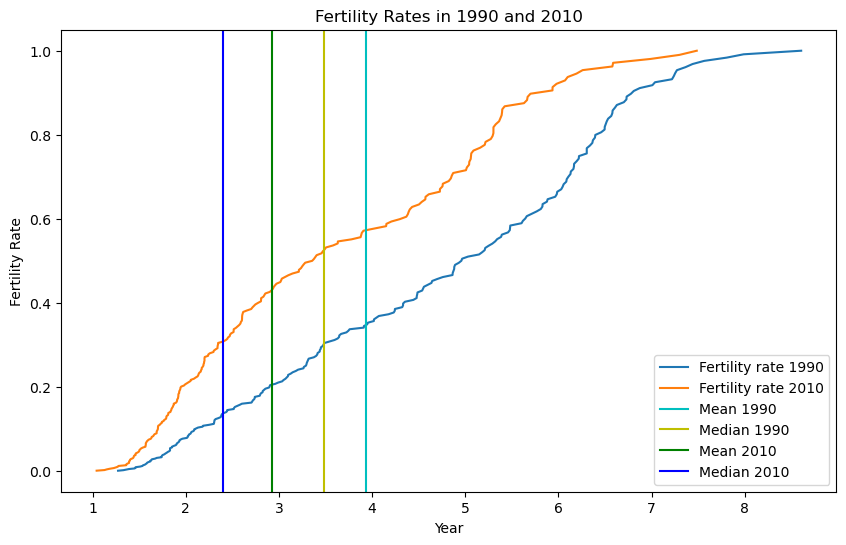

In [32]:
#Plot the cumulative distribution of fertility rate in 1990 and 2010
plt.figure(figsize=(10,6))
plt.title("Fertility Rates in 1990 and 2010")
plt.xlabel("Year")
plt.ylabel("Fertility Rate")
plt.plot(fertility_data_1990,cummulative_data_1990, label = "Fertility rate 1990")
plt.plot(fertility_data_2010,cummulative_data_2010, label = "Fertility rate 2010")

#Display vertical lines at the mark of the mean and median in 1990
plt.axvline(x = mean_1990, color = 'c', label = "Mean 1990")
plt.axvline(x = median_1990, color = 'y', label = "Median 1990")

#Display vertical lines at the mark of the mean and median in 2010
plt.axvline(x = mean_2010, color = 'g', label = "Mean 2010")
plt.axvline(x = median_2010, color = 'b', label = "Median 2010")

plt.legend()
plt.show()

5. Download the data for the “Happy Planet Index” from hpi_data and “Corruption Perceptions Index” from https://www.transparency.org/en/cpi/2016/index/nzl. Both datasets are available as excel spread-sheets. Find matching countries for both indices and make a carefully labelled scatter plot of HPI against CPI to demonstrate the relationship using ranks in both cases. Are there any countries that stand out as being unusual?

In [33]:
#Load the Happy Planet Index data from the downloaded files
hpi_data = pd.read_excel('hpi_data_2016.xlsx',4,skiprows=5)
#Select the 'HPI Rank' and 'Country' columns
hpi_data_trim = hpi_data[["HPI Rank","Country"]]

In [34]:
#Load the Corruption Perceptions Index data from the downloaded files
corruptions_index_data = pd.read_excel('CPI2016_Results.xlsx')
#Select the 'HPI Rank' and 'Country' columns
corruptions_index_data_trim = corruptions_index_data[["Country","Rank","WB Code"]]

C:\Users\Sama\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():


In [35]:
#Merge the HPI and CPI dataframes into one dataframe
corruptions_hpi_data = pd.merge(hpi_data_trim,corruptions_index_data_trim, on="Country")

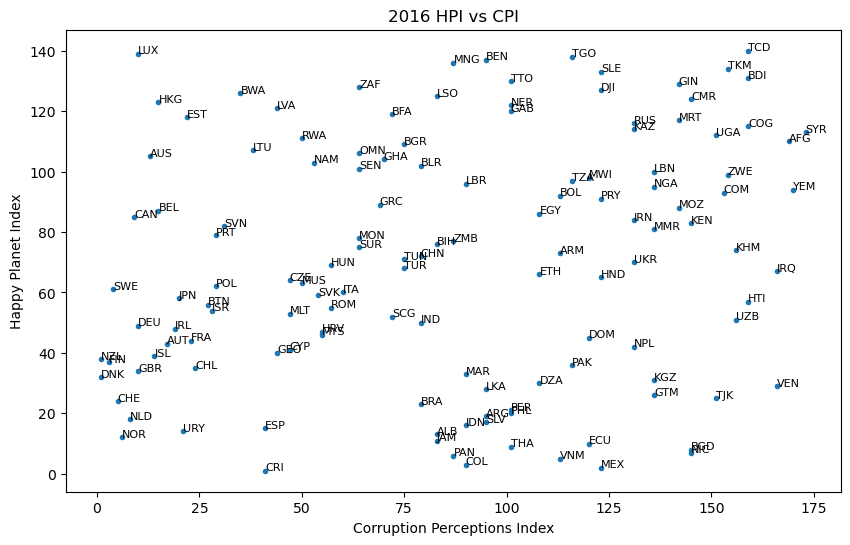

In [36]:
#Plot a scatterplot of HPI against CPI
plt.figure(figsize = (10,6))
plt.title("2016 HPI vs CPI")
plt.xlabel("Corruption Perceptions Index")
plt.ylabel("Happy Planet Index")
plt.scatter(corruptions_hpi_data['Rank'],corruptions_hpi_data['HPI Rank'], marker=".")

#Using a for-loop, add text at every data point on the scatter plot to annotate the country displayed
for index,row in corruptions_hpi_data.iterrows():
    plt.text(row['Rank'],row['HPI Rank'],row['WB Code'],fontsize=8)
    
plt.show()